In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Читаем изображение. Объявляем функции для вывода изображений

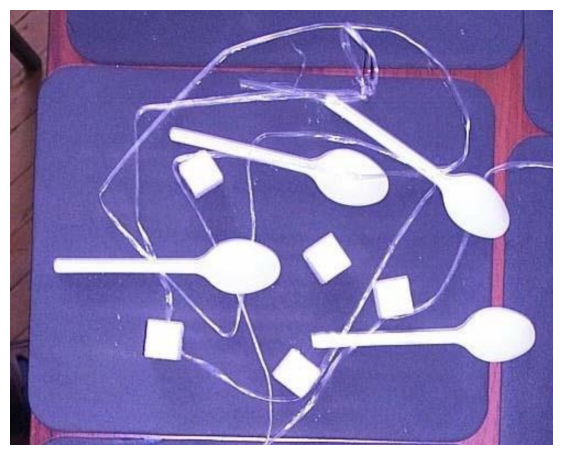

In [34]:
image = cv2.imread("sahar.png")[:, :, ::-1]

def show_image(image):
    plt.figure(dpi=100, figsize=(7,7))
    plt.axis('off')
    plt.imshow(image)
    
def show_grey(image):
    plt.figure(dpi=100, figsize=(7,7))
    plt.axis('off')
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    
show_image(image)

# Применяем эрозию и дилатацию, чтобы избавиться от белых линий

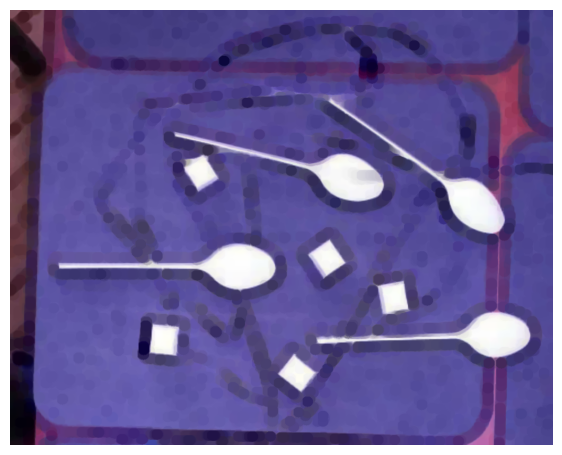

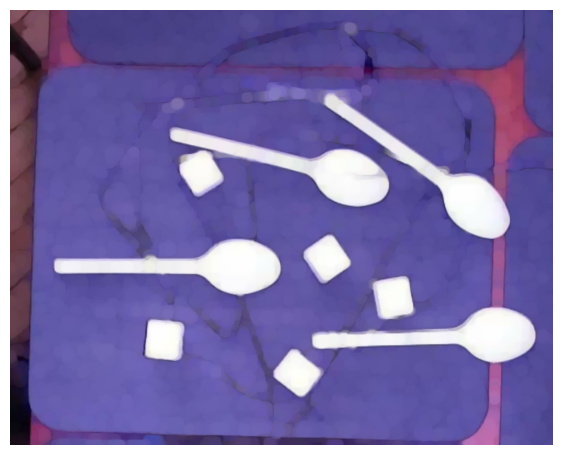

In [35]:
# элиптическое ядро MORPH_ELLIPSE
hole_mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))

# Применяем эрозию и дилатацию, чтобы избавиться от белых линий
mask_image = cv2.erode(image, hole_mask)
mask_image2 = cv2.dilate(mask_image, hole_mask)
show_image(mask_image)
show_image(mask_image2)


# Переводим изображение в greyscale 

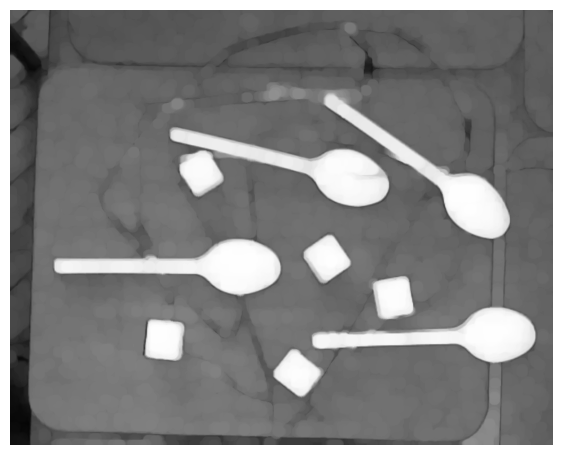

In [36]:
img_grey = cv2.cvtColor(mask_image2, cv2.COLOR_BGR2GRAY)
show_grey(img_grey)


# Применяем бинаризацию по Отсу

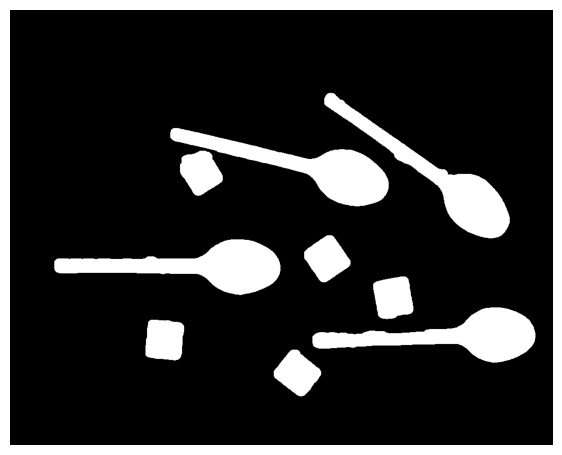

In [37]:
ret,bin_grey = cv2.threshold(img_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_grey(bin_grey)

## - Находим контуры
## - сортируем по занимаемой площади
## - находим индекс с максимальной разницей
## - используем его как разграничитель для классов

In [38]:
# find contours
contours, hierarchy = cv2.findContours(bin_grey, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# sort contours, find biggest diff between areas
output_image = image.copy()
cnt_area = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    cnt_area.append(area)
indices = np.array(cnt_area).argsort()
sorted_area = sorted(cnt_area)
print(f"отсортированные площади: {sorted_area} \n - и их индексы: {indices}" )
border_val_id = np.argmax(np.diff(sorted_area))+1
border_value = sorted_area[border_val_id]
print(f"Второй класс начинается с индекса {border_val_id} \n - и имеет значение: {border_value}")

отсортированные площади: [4855.0, 4959.0, 5026.5, 5035.5, 5053.0, 19108.0, 19573.5, 19762.5, 20563.0] 
 - и их индексы: [6 0 5 3 1 8 2 7 4]
Второй класс начинается с индекса 5 
 - и имеет значение: 19108.0


# Разбиваем контуры на классы сахарка и ложек

In [20]:
sugar = indices[:border_val_id]
spoons = indices[border_val_id:]

# Отрисовываем контуры по классам и выводим количественную информацию

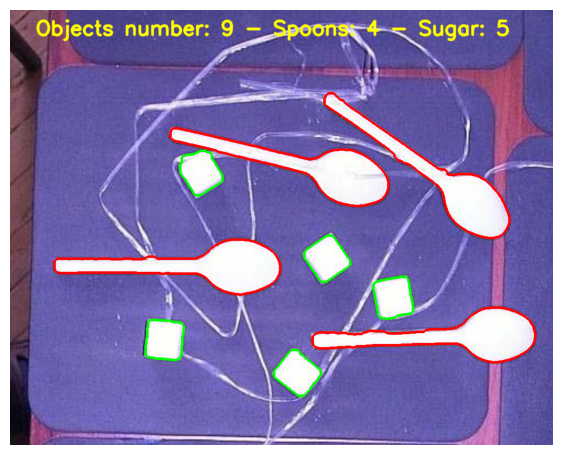

In [32]:
countour_img = image.copy()
cv2.putText(countour_img, f"Objects number: {len(indices)} - Spoons: {len(spoons)} - Sugar: {len(sugar)}", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 255, 0), 3, cv2.LINE_AA)
cv2.drawContours(countour_img, contours, 2, (0,255,0), 3)
for i in indices:
    
    if i in sugar:
        cv2.drawContours(countour_img, contours, i, (0,255,0), 3)
    else:
        cv2.drawContours(countour_img, contours, i, (255,0,0), 3)
show_image(countour_img)